&emsp;&emsp;感知机（perceptron）这一算法。感知机是由美国学者FrankRosenblatt在1957年提出来的。为何我们现在还要学习这一很久以前就有的算法呢？因为感知机也是作为神经网络（深度学习）的起源的算法。因此，学习感知机的构造也就是学习通向神经网络和深度学习的一种重要思想。
<br>&emsp;&emsp;本章我们将简单介绍一下感知机，并用感知机解决一些简单的问题。希望读者通过这个过程能熟悉感知机。
>严格地讲，本章中所说的感知机应该称为“人工神经元”或“朴素感知机”，但是因为很多基本的处
理都是共通的，所以这里就简单地称为“感知机”。

# 感知机

## 感知机是什么

&emsp;&emsp;感知机接收多个输入信号，输出一个信号。这里所说的“信号”可以想象成电流或河流那样具备“流动性”的东西。像电流流过导线，向前方输送电子一样，感知机的信号也会形成流，向前方输送信息。但是，和实际的电流不同的是，感知机的信号只有“流/不流”（1/0）两种取值。在本书中，0对应“不传递信号”，1对应“传递信号”

&emsp;&emsp; 如图一个接收两个输入信号的感知机的例子。$x_1$ 、$x_2$ 是输入信号，$y$ 是输出信号，$w_1$ 、$w_2$ 是权重（w是weight的首字母）。图中的○称为“神经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重（$w_1x_1$ 、$w_2x_2$ ）。神经元会计算传送过来的信号的总和，只有当这个总和超过
了某个界限值时，才会输出1。这也称为“神经元被激活” 。这里将这个界
限值称为**阈值**，用符号 $\theta$ 表示。

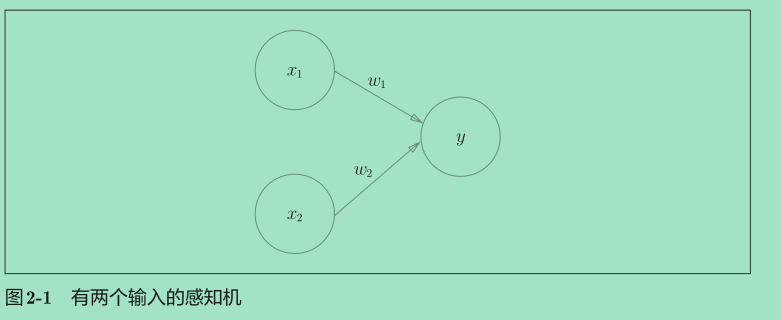

 &emsp;&emsp;感知机的运行原理只有这些！把上述内容用数学式来表示就是：
 
 $$
y=\left\{ \begin{array}{c}
	0\ \ \left( w_1x_1+w_2x_2\le \theta \right)\\
	1\ \ \left( w_1x_1+w_2x_2>\theta \right)\\
\end{array} \right. 
$$


&emsp;&emsp; 感知机的多个输入信号都有各自固有的权重，这些权重发挥着控制各个信号的重要性的作用。也就是说，权重越大，对应该权重的信号的重要性就
越高。

> 权重相当于电流里所说的电阻。电阻是决定电流流动难度的参数，电阻越低，通过的电流就越大。而感知机的权重则是值越大，通过的信号就越大。不管是电阻还是权重，在控制信号流动难度（或者流动容易度）这一点上的作用都是一样的。

## 简单逻辑电路

### 与门

&emsp;&emsp;现在让我们考虑用感知机来解决简单的问题。这里首先以逻辑电路为题材来思考一下与门（AND gate）。与门是有两个输入和一个输出的门电路。下表这种输入信号和输出号的对应表称为“真值表”。如下表所示，与门仅在两个输入均为1时输出1，其他时候则输出0。

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

&emsp;&emsp; 下面考虑用感知机来表示这个与门。需要做的就是确定能满足图2-2的真值表的$w_1$ 、$w_2$ 、$\theta$ 的值。那么，设定什么样的值才能制作出满足上表的条件的感知机呢？

&emsp;&emsp;实际上，满足图2-2的条件的参数的选择方法有无数多个。比如，当$(w_1 , w_2 ,\theta ) = (0.5, 0.5, 0.7)$时，可以满足上表的条件。此外，当($w_1 , w_2 , \theta $)为(0.5, 0.5, 0.8)或者(1.0, 1.0, 1.0)时，同样也满足与门的条件。设定这样的参数后，仅当 $x_1$ 和 $ x_2 $ 同时为1时，信号的加权总和才会超过给定的阈值 $\theta$ 。

### 与非门

&emsp;&emsp; 接着，我们再来考虑一下与非门（NAND gate）。NAND是Not AND的意思，与非门就是颠倒了与门的输出。用真值表表示的话，如下表所示，仅当 $x_1$ 和 $x_2$ 同时为1时输出0，其他时候则输出1。那么与非门的参数又可以是什么样的组合呢？

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

&emsp;&emsp; 要表示与非门，可以用$(w_1 , w_2 , \theta) = (−0.5, −0.5, −0.7)$这样的组合（其他的组合也是无限存在的）。实际上，只要把实现与门的参数值的符号取反，就可以实现与非门。

******

### 或门

&emsp;&emsp; 接下来看一下表所示的或门。或门是“只要有一个输入信号是1，输出就为1”的逻辑电路。那么我们来思考一下，应该为这个或门设定什么样的参数呢

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

>这里决定感知机参数的并不是计算机，而是我们人。我们看着真值表这种“训练数据”，人工考虑（想到）了参数的值。而机器学习的课题就是将这个决定参数值的工作交由计算机自动进行。**学习**是确定合适的参数的过程，而人要做的是思考感知机的构造（模型），并把训练数据交给计算机。

&emsp;&emsp;如上所示，我们已经知道使用感知机可以表示与门、与非门、或门的逻辑电路。这里重要的一点是：与门、与非门、或门的感知机构造是一样的。实际上，3个门电路只有参数的值（权重和阈值）不同。也就是说，相同构造的感知机，只需通过适当地调整参数的值，就可以像“变色龙演员”表演不同的角色一样，变身为与门、与非门、或门。

## 感知机的实现

### 简单的实现

&emsp;&emsp; 现在，我们用Python来实现刚才的逻辑电路。这里，先定义一个接收参数 $x_1$ 和 $x_2$ 的 AND 函数

In [6]:
def AND(x1,x2):
    w1,w2,theta=0.5,0.5,0.7
    tmp=x1*w1+x2*w2
    if tmp<= theta:
        return 0
    elif tmp>theta:
        return 1

&emsp;&emsp;在函数内初始化参数 $w_1 、 w_2 、 \theta$，当输入的加权总和超过阈值时返回 1 ，否则返回 0 。我们来确认一下输出结果

In [7]:
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

&emsp;&emsp;果然和我们预想的输出一样！这样我们就实现了与门。按照同样的步骤，也可以实现与非门和或门，不过让我们来对它们的实现稍作修改。

### 导入权重和偏置

&emsp;&emsp;刚才的与门的实现比较直接、容易理解，但是考虑到以后的事情，我们将其修改为另外一种实现形式。在此之前，首先上述式$\theta$换成$−b$，于是就可以用下式来表示感知机的行为。

 $$
y=\left\{ \begin{array}{c}
	0\ \ \left( b+w_1x_1+w_2x_2\le 0 \right)\\
	1\ \ \left( b+w_1x_1+w_2x_2>0 \right)\\
\end{array} \right. 
$$

&emsp;&emsp;两式虽然有一个符号不同，但表达的内容是完全相同的。此处，$b$ 称为**偏置**，$w_1$ 和 $w_2$ 称为**权重**。如式（2.2）所示，感知机会计算输入信号和权重的乘积，然后加上偏置，如果这个值大于0则输出1，否则输出0。下面，我们使用NumPy，按上式的方式实现感知机。在这个过程中，我们用Python的解释器逐一确认结果

In [29]:
import numpy as np 
x=np.array([0,1]) #输入
w=np.array([0.5,0.5]) #权重
b=-0.7 #偏置
w*x,np.sum(w*x),np.sum(w*x)+b #输出矩阵，矩阵元素，函数和（误差由浮点小数造成的运算误差）

(array([0. , 0.5]), 0.5, -0.19999999999999996)

&emsp;&emsp;如上例所示，在NumPy数组的乘法运算中，当两个数组的元素个数相同时，各个元素分别相乘，因此 $w*x$ 的结果就是它们的各个元素分别相乘（ [0, 1] *[0.5, 0.5] => [0, 0.5] ）。之后， np.sum(w*x) 再计算相乘后的各个元素的总和。最后再把偏置加到这个加权总和上，就完成了上式的计算。

### 使用权重和偏置的实现（感知机）

&emsp;&emsp;使用权重和偏置，可以像下面这样实现与门。

In [22]:
def NAND(x1,x2):  #与门感知机 
    x=np.array([x1,x2])
    w=np.array([0.5,0.5]) 
    b=-0.7 
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0 
    else:
        return 1

&emsp;&emsp; 这里把 $−\theta$命名为偏置 $b$，但是请注意，偏置和权重$w_1 、w_2 $的作用是不一样的。具体地说，$w_1$ 和 $w_2$ 是控制输入信号的重要性的参数，而偏置是调整神经元被激活的容易程度（输出信号为1的程度）的参数。比如，若 $b$ 为 −0.1，则只要输入信号的加权总和超过0.1，神经元就会被激活。但是如果 $b$ 为−20.0，则输入信号的加权总和必须超过20.0，神经元才会被激活。像这样，偏置的值决定了神经元被激活的容易程度。另外，这里我们将 $w_1$ 和 $w_2$ 称为权重，将b称为偏置，但是根据上下文，有时也会将 $b、w_1 、w_2 $ 这些参数统称为权重。

>偏置这个术语，有“穿木屐”的效果，即在没有任何输入时（输入为0时），给输出穿上多高的木屐（加上多大的值）的意思。实际上，在上式的  $b + w_1 x_1 + w_2 x_2 $ 的计算中，当输入 $x_1$ 和 $x_2$ 为0时，只输出偏置的值。 
 >>因为木屐的底比较厚，穿上它后，整个人也会显得更高。——译者注

&emsp;&emsp;接着，我们继续实现与非门和或门。

In [21]:
def NAND(x1,x2):  #非门感知机
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5]) #仅权重和偏置与AND不同！！！
    b=0.7  #!!!
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0 
    else:
        return 1

In [27]:
def OR(x1,x2):  #或门感知机
    x=np.array([x1,x2])
    w=np.array([0.5,0.5]) #仅权重和偏置与AND不同！！！
    b=-0.2 #!!!
    tmp=np.sum(w*x)+b
    if tmp<=0:
        return 0 
    else:
        return 1

&emsp;&emsp;我们在2.2节介绍过，与门、与非门、或门是具有相同构造的感知机，区别只在于权重参数的值。因此，在与非门和或门的实现中，仅设置权重和偏置的值这一点和与门的实现不同。

## 感知机的局限性

&emsp;&emsp; 到这里我们已经知道，使用感知机可以实现与门、与非门、或门三种逻辑电路。现在我们来考虑一下异或门（XOR gate）。

### 异或门

&emsp;&emsp; 异或门也被称为**逻辑异或**电路。如图2-5所示，仅当 $x_1$ 或 $x_2$ 中的一方为1时，才会输出1（“异或”是拒绝其他的意思）。那么，要用感知机实现这个异或门的话，应该设定什么样的权重参数呢？

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

&emsp;&emsp;实际上，用前面介绍的感知机是无法实现这个异或门的。为什么用感知机可以实现与门、或门，却无法实现异或门呢？下面我们尝试通过画图来思考其中的原因。

&emsp;&emsp;首先，我们试着将或门的动作形象化。或门的情况下，当权重参数 $(b, w_1 , w_2 ) = (−0.5, 1.0, 1.0)$时，可满足上表的真值表条件。此时，感知机可用下式来表示

 $$
y=\left\{ \begin{array}{c}
	0\ \ \left( -0.5+w_1x_1+w_2x_2\le 0 \right)\\
	1\ \ \left( -0.5+w_1x_1+w_2x_2>0 \right)\\
\end{array} \right. 
$$

&emsp;&emsp;

&emsp;&emsp; 上式表示的感知机会生成由直线 $-0.5 + x_1 + x_2 = 0$ 分割开的两个空间。其中一个空间输出1，另一个空间输出0，如下图所示。

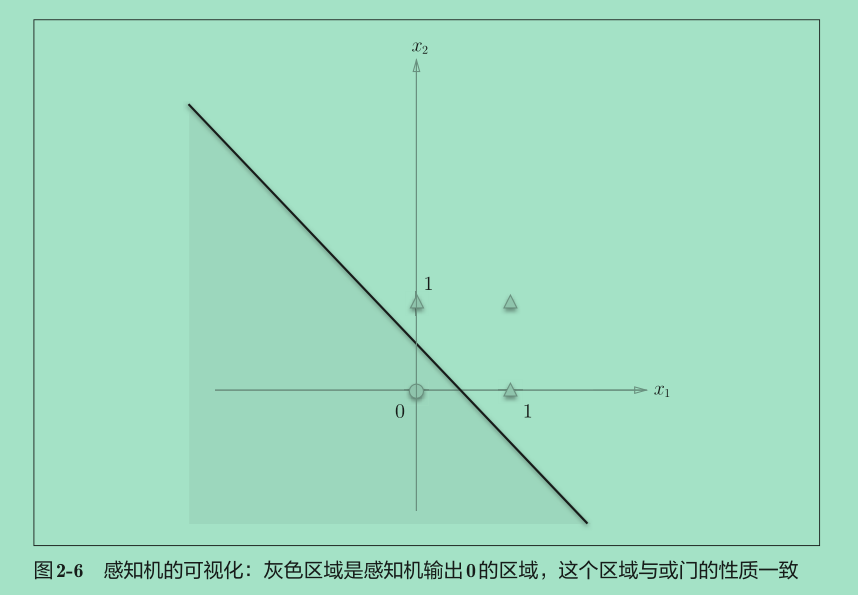

&emsp;&emsp; 或门在 $(x_1 , x_2 ) = (0, 0)$时输出0，在$(x_1 , x_2 ) $ 为(0, 1)、(1, 0)、(1, 1)时输出1。图2-6中，○表示0，△表示1。如果想制作或门，需要用直线将上图中的○和△分开。实际上，刚才的那条直线就将这4个点正确地分开了。

&emsp;&emsp;那么，换成异或门的话会如何呢？能否像或门那样，用一条直线作出分割图2-7中的○和△的空间呢？

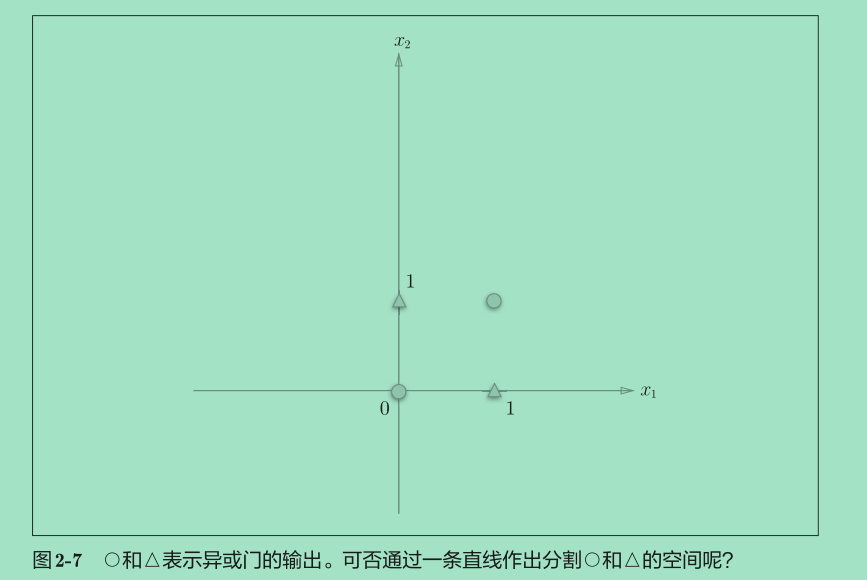

&emsp;&emsp; 想要用一条直线将图2-7中的○和△分开，无论如何都做不到。事实上，用一条直线是无法将○和△分开的。

### 线性和非线性

&emsp;&emsp;图2-7中的○和△无法用一条直线分开，但是如果将“直线”这个限制条件去掉，就可以实现了。比如，我们可以像下图那样，作出分开○和△的空间。

&emsp;&emsp; 感知机的局限性就在于它只能表示由一条直线分割的空间。下图这样弯曲的曲线无法用感知机表示。另外，由下图这样的曲线分割而成的空间称为**非线性**空间，由直线分割而成的空间称为**线性**空间。线性、非线性这两个术语在机器学习领域很常见，可以将其想象成上图和下图所示的直线和曲线。

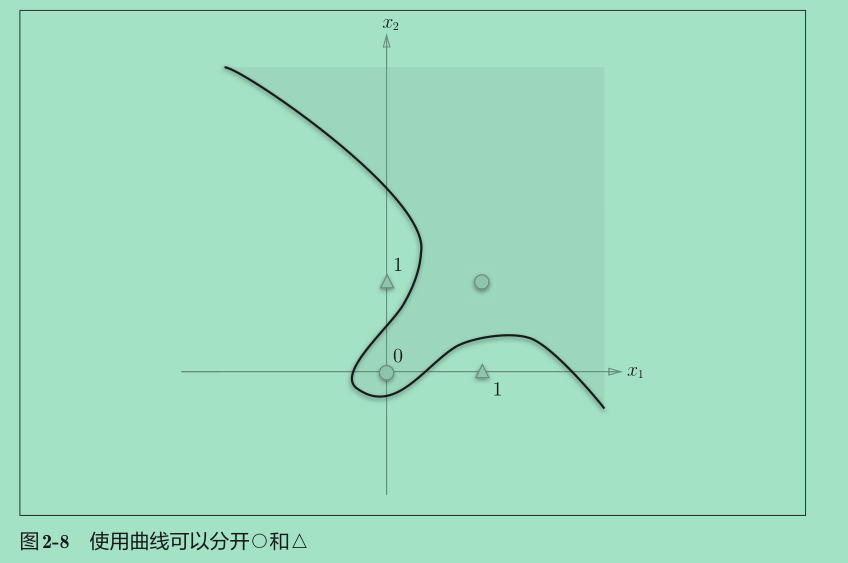

## 多层感知机

&emsp;&emsp;感知机不能表示异或门让人深感遗憾，但也无需悲观。实际上，感知机的绝妙之处在于它可以“叠加层” （通过叠加层来表示异或门是本节的要点）。

### 异或门的实现

&emsp;&emsp;下面我们试着用Python来实现异或门。使用之前定义的AND函数、NAND函数、OR函数，可以像下面这样（轻松地）实现。

In [30]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
XOR(0, 0) ,XOR(1, 0),XOR(0, 1),XOR(1, 1)

(0, 0, 0, 1)

&emsp;&emsp; 这样，异或门的实现就完成了。下面我们试着用感知机的表示方法（明
确地显示神经元）来表示这个异或门，结果如图2-13所示。

&emsp;&emsp; 如图2-13所示，异或门是一种多层结构的神经网络。这里，将最左边的一列称为第0层，中间的一列称为第1层，最右边的一列称为第2层。图2-13所示的感知机与前面介绍的与门、或门的感知机（图2-1）形状不同。实际上，与门、或门是单层感知机，而异或门是2层感知机。叠加了多层的感知机也称为**多层感知机**（multi-layered perceptron）。

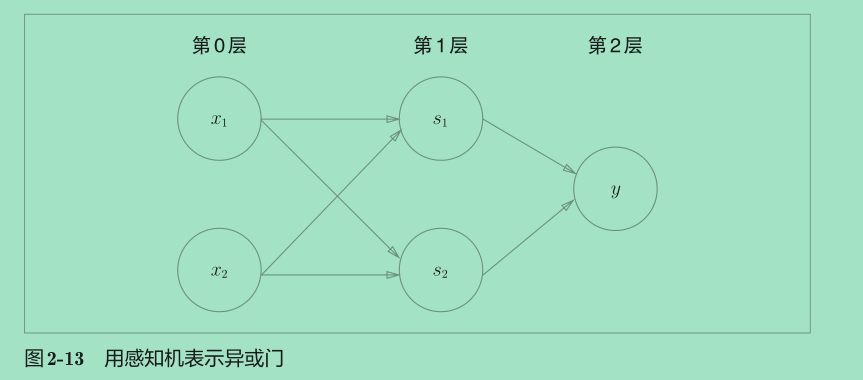

>图2-13中的感知机总共由3层构成，但是因为拥有权重的层实质
上只有2层（第0层和第1层之间，第1层和第2层之间），所以称
为“2层感知机”。不过，有的文献认为图2-13的感知机是由3层
构成的，因而将其称为“3层感知机”。

&emsp;&emsp; 在图2-13所示的2层感知机中，先在第0层和第1层的神经元之间进行信号的传送和接收，然后在第1层和第2层之间进行信号的传送和接收，具体如下所示。

> 1. 第0层的两个神经元接收输入信号，并将信号发送至第1层的神经元。
2. 第1层的神经元将信号发送至第2层的神经元，第2层的神经元输出y。

## 小结

本章我们学习了感知机。感知机是一种非常简单的算法，大家应该很快就能理解它的构造。感知机是下一章要学习的神经网络的基础，因此本章的内容非常重要。

本章所学的内容
* 感知机是具有输入和输出的算法。给定一个输入后，将输出一个既
定的值。
* 感知机将权重和偏置设定为参数。
* 使用感知机可以表示与门和或门等逻辑电路。
* 异或门无法通过单层感知机来表示。
* 使用2层感知机可以表示异或门。
* 单层感知机只能表示线性空间，而多层感知机可以表示非线性空间。
* 多层感知机（在理论上）可以表示计算机。